In [1]:
from Methods.e import CCA,segment,MO,createKeyPoints,Homography,warp, mutual_information
import cv2
import matplotlib.pyplot as plt
import ants
import numpy as np

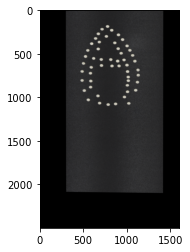

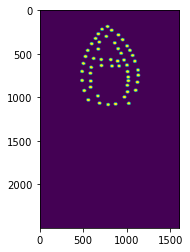

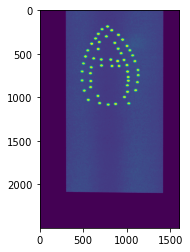

In [2]:
fixed_RGB = cv2.imread(r'/Users/khaledhamad/Desktop/image_0 (4).png')          # Image that needs to be registered.
moving_RGB = cv2.imread(r'/Users/khaledhamad/Desktop/image_0 (5).png')
fixed_gray = cv2.cvtColor(fixed_RGB, cv2.COLOR_BGR2GRAY)
moving_gray = cv2.cvtColor(moving_RGB, cv2.COLOR_BGR2GRAY)
fixed_gray[:,1500:]=0
img1_seg=segment(np.copy(fixed_gray))
img2_seg=segment(np.copy(moving_gray))
img1_MO=MO(img1_seg)
img2_MO=MO(img2_seg)
img1_CCA=CCA(img1_MO)
img2_CCA=CCA(img2_MO)
k1=createKeyPoints(img1_CCA)
k2=createKeyPoints(img2_CCA)
H=Homography(k1,k2)
Alignmentresult_RGB=warp(fixed_RGB,moving_RGB,H)
Alignmentresult_gray=warp(fixed_gray,moving_gray,H)
Alignmentresult_seg=warp(img1_MO,img2_MO,H)

plt.imshow(Alignmentresult_RGB)
plt.show()
plt.imshow(Alignmentresult_seg)
plt.show()
plt.imshow(Alignmentresult_gray)
plt.show()

In [3]:
fixed_RGB_cut=fixed_RGB[:2000,400:1400]
fixed_gray_cut=fixed_gray[:2000,400:1400]
fixed_seg_cut=img1_MO[:2000,400:1400]

movingimg_RGB=Alignmentresult_RGB[:2000,400:1400]
movingimg_gray=Alignmentresult_gray[:2000,400:1400]
movingimg_seg=Alignmentresult_seg[:2000,400:1400]

In [ ]:
fixed_RGB_ant= ants.from_numpy(np.copy(fixed_RGB_cut))
# fixed_RGB_ant= ants.image_read(r'/Users/khaledhamad/Desktop/UF/PhD/github codes/ANTsTutorial/phantomData1/phantomtemplate_g.jpg')
fixed_gray_ant= ants.from_numpy(np.copy(fixed_gray_cut))
fixed_seg_ant= ants.from_numpy(np.copy(fixed_seg_cut))

moving_RGB_ant=ants.from_numpy(np.copy(movingimg_RGB))
# moving_RGB_ant= ants.image_read(r'/Users/khaledhamad/Desktop/UF/PhD/github codes/ANTsTutorial/phantomData1/SWIR_g.jpg')
moving_gray_ant=ants.from_numpy(np.copy(movingimg_gray))
moving_seg_ant=ants.from_numpy(np.copy(movingimg_seg))

mytx_RGB  = ants.registration(fixed=fixed_RGB_ant , moving=moving_RGB_ant , type_of_transform='SyN')
mytx_gray = ants.registration(fixed=fixed_gray_ant, moving=moving_gray_ant, type_of_transform='SyN')
mytx_seg  = ants.registration(fixed=fixed_seg_ant , moving=moving_seg_ant , type_of_transform='SyN')

warped_moving_RGB = mytx_RGB['warpedmovout']
warped_moving_gray = mytx_gray['warpedmovout']
warped_moving_seg = mytx_seg['warpedmovout']

#fixed.plot(overlay=warped_moving,title='After Registration')
# plt.imshow(o)
# plt.show()

nbins=100

hist_2d_RGB , x_edges, y_edges = np.histogram2d(fixed_RGB_ant.numpy().ravel(),moving_RGB_ant.numpy().ravel(),bins=nbins)
hist_2d_gray, x_edges, y_edges = np.histogram2d(fixed_gray_ant.numpy().ravel(),moving_gray_ant.numpy().ravel(),bins=nbins)
hist_2d_seg , x_edges, y_edges = np.histogram2d(fixed_seg_ant.numpy().ravel(),moving_seg_ant.numpy().ravel(),bins=nbins)


# plt.imshow(hist_2d_RGB.T, origin='lower')
# plt.xlabel('T1 signal bin')
# plt.ylabel('T2 signal bin')
# plt.show()
print(mutual_information(hist_2d_RGB))
print(mutual_information(hist_2d_gray))
print(mutual_information(hist_2d_seg))


hist_2d_RGB_after, x_edges, y_edges = np.histogram2d(fixed_RGB_ant.numpy().ravel(),warped_moving_RGB.numpy().ravel(),bins=nbins)
hist_2d_gray_after, x_edges, y_edges = np.histogram2d(fixed_gray_ant.numpy().ravel(),warped_moving_gray.numpy().ravel(),bins=nbins)
hist_2d_seg_after, x_edges, y_edges = np.histogram2d(fixed_seg_ant.numpy().ravel(),warped_moving_seg.numpy().ravel(),bins=nbins)
# plt.imshow(hist_2d_RGB_after.T, origin='lower')
# plt.xlabel('T1 signal bin')
# plt.ylabel('T2 signal bin')
# plt.show()
print(mutual_information(hist_2d_RGB_after))
print(mutual_information(hist_2d_gray_after))
print(mutual_information(hist_2d_seg_after))

# fig, ax=plt.subplots(figsize=(20,10))
# plt.imshow(abs(fixed_RGB_ant.numpy()-moving_RGB_ant.numpy()))
# plt.colorbar()
# plt.show()


# fig, ax=plt.subplots(figsize=(20,10))
# plt.imshow(abs((fixed_RGB_ant.numpy()-warped_moving_RGB.numpy())))
# plt.colorbar()
# plt.show()



# plt.plot(fixed_RGB_ant.numpy().ravel(), movingimg_RGB.ravel(), '.')
# plt.xlabel('T1 signal')
# plt.ylabel('T2 signal')
# plt.title('T1 vs T2 signal')
# plt.show()


fig,ax=plt.subplots(6,3,figsize=(30,30))
ax[0,0].imshow(hist_2d_RGB.T, origin='lower')
ax[0,1].imshow(hist_2d_gray.T, origin='lower')
ax[0,2].imshow(hist_2d_seg.T, origin='lower')

ax[1,0].imshow(hist_2d_RGB_after.T, origin='lower')
ax[1,1].imshow(hist_2d_gray_after.T, origin='lower')
ax[1,2].imshow(hist_2d_seg_after.T, origin='lower')


ax[2,0].plot(fixed_RGB_ant.numpy().ravel(), moving_RGB_ant.numpy().ravel(), '.')
ax[2,1].plot(fixed_gray_ant.numpy().ravel(), moving_gray_ant.numpy().ravel(), '.')
ax[2,2].plot(fixed_seg_ant.numpy().ravel(), moving_seg_ant.numpy().ravel(), '.')

ax[3,0].plot(fixed_RGB_ant.numpy().ravel(), warped_moving_RGB.numpy().ravel(), '.')
ax[3,1].plot(fixed_gray_ant.numpy().ravel(), warped_moving_gray.numpy().ravel(), '.')
ax[3,2].plot(fixed_seg_ant.numpy().ravel(), warped_moving_seg.numpy().ravel(), '.')

ax[4,0].imshow(abs(fixed_RGB_ant.numpy()-moving_RGB_ant.numpy()))
ax[4,1].imshow(abs(fixed_gray_ant.numpy()-moving_gray_ant.numpy()))
ax[4,2].imshow(abs(fixed_seg_ant.numpy()-moving_seg_ant.numpy()))

ax[5,0].imshow(abs(fixed_RGB_ant.numpy()-warped_moving_RGB.numpy()))
ax[5,1].imshow(abs(fixed_gray_ant.numpy()-warped_moving_gray.numpy()))
ax[5,2].imshow(abs(fixed_seg_ant.numpy()-warped_moving_seg.numpy()))


: 

: 

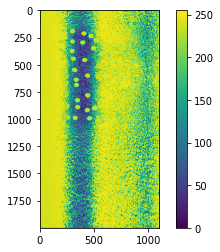

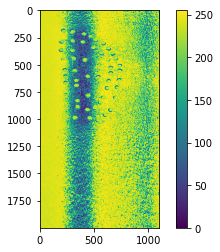

In [6]:
plt.imshow((fixed_gray_ant.numpy()-warped_moving_gray.numpy()))
plt.colorbar()
plt.show()
plt.imshow((fixed_gray_ant.numpy()-moving_gray_ant.numpy()))
plt.colorbar()
plt.show()

array([0, 1], dtype=uint8)

In [ ]:
hist_2d_log = np.zeros(hist_2d_RGB_after.shape)
non_zeros = hist_2d_RGB_after != 0
hist_2d_log[non_zeros] = np.log(hist_2d_RGB_after[non_zeros])
plt.imshow(hist_2d_log.T, origin='lower')
plt.xlabel('T1 signal bin')
plt.ylabel('T2 signal bin')
plt.show()